# TP1. Analysing and visualising data with `numpy`, `pandas` and `matplotlib`

*In this TP I have considered two Dataframes for training myrself with different data loading, visualisation and analysis techniques:*

## 1. AirBnB

### 1.0 A simple scatter plot

Plot the number of reviews per month as a function of price using [`scatter`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter#pandas.DataFrame.plot.scatter) from `pandas`.

1. Plot the `reviews_per_month` as a function of `price`, what do you observe? 
2. How would you plot your data if you need to answer the question "For which price does one have the maximum number of reviews per month?"
3. Is a linear scale on the price convenient? How to change to a logarithmic scaling?

Take care of naming your axes, using legends where appropriate, and putting an appropriate plot title.

In [86]:
# Firstly importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# Read the dataframe 
df = pd.read_csv('listings.csv')
df.head(3)

id                                name  host_id   host_name  \
0   56766  Amazing duplex-terrace in old Lyon   269557    Isabelle   
1   77104     Nice Flat in the center of Lyon   411285  Clementine   
2  134539  Centre of old town,home sweet home   660135      Polali   

   neighbourhood_group       neighbourhood  latitude  longitude  \
0                  NaN   5e Arrondissement  45.76312    4.82813   
1                  NaN  1er Arrondissement  45.76842    4.82745   
2                  NaN   5e Arrondissement  45.75930    4.82548   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    120              30                 55  2018-09-04   
1  Entire home/apt    100               2                 21  2022-06-09   
2  Entire home/apt     80               2                121  2022-05-29   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.38                               1                91   
1               0.15                               1               142   
2               0.89                               1                71   

   number_of_reviews_ltm                                            license  
0                      0  Available with a mobility lease only ("bail mo...  
1                      1                                      6938113058353  
2                      3                                      6938513221658

*1. Plot the `reviews_per_month` as a function of `price`, what do you observe?*

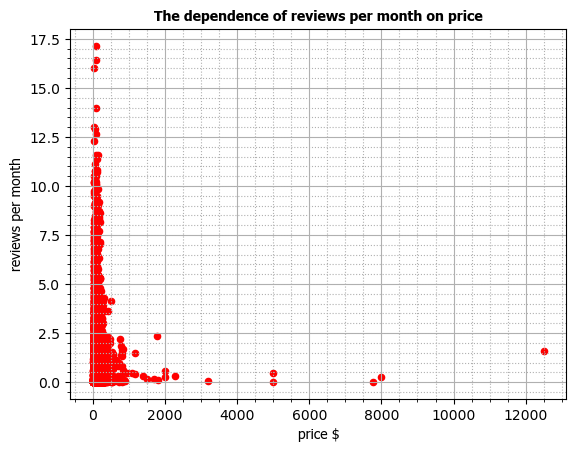

In [4]:
# 1st step scatter plotting the data where x is the 'price' and 'reviews_per_month' to see what info it gives us 
reviews = df.plot(x = 'price', y ='reviews_per_month', kind = 'scatter', c = 'red')
# naming and formatting the labels and titles 
plt.xlabel('price $', {'fontname':'Tahoma'}, fontweight='light', fontsize = 10)
plt.ylabel('reviews per month', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)
plt.title('The dependence of reviews per month on price', {'fontname':'Tahoma'}, fontweight = 'bold', fontsize = 10)
# adding the main and additional grid 
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')


*2. How would you plot your data if you need to answer the question "For which price does one have the maximum number of reviews per month?"*

Text(0, 0.5, 'Sum of reviews for each price')

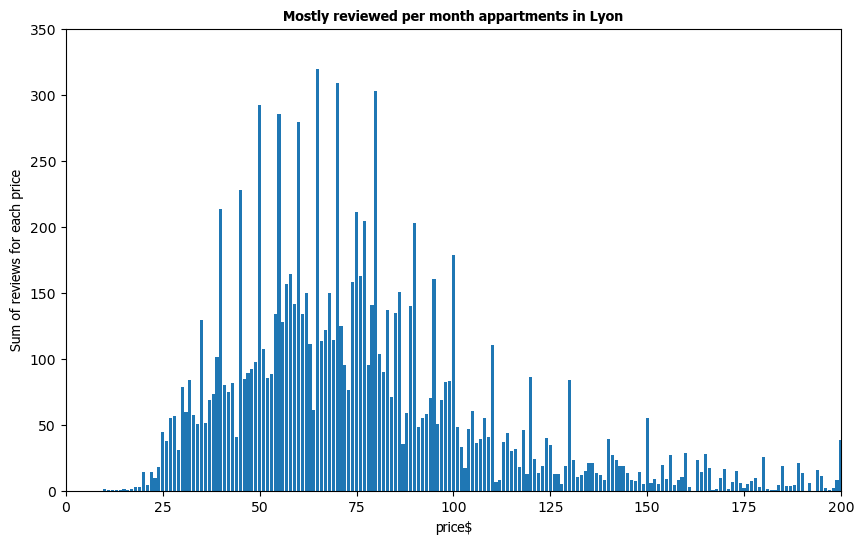

In [61]:
# grouping the df by the values in the 'price' column. It creates a group for each unique value in the 'price' column
sum_rev = df.groupby('price')['reviews_per_month'].sum().reset_index()
# creating the figure with exact size 
plt.figure(figsize=(10, 6))
# also i give the limits to see better more reviewed appartmnets because we have very large gap between prices
plt.xlim(0, 200)
plt.ylim(0, 350)
# making the bar plot by using new df "sum_rev"
bars = plt.bar(sum_rev['price'], sum_rev['reviews_per_month'])
# naming and formatting the labels and titles 
plt.title('Mostly reviewed per month appartments in Lyon', {'fontname' : 'Tahoma'}, fontweight = 'bold', fontsize = 10)
plt.xlabel('price$', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)
plt.ylabel('Sum of reviews for each price', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)

In [79]:
#i want to find the index of the highest value of reviews per month and the result is 57 
high_bar_index = sum_rev['reviews_per_month'].idxmax()
high_bar_index

57

In [78]:
#i want to highlight the highest bar with another color by using 'set_color' 
bars[high_bar_index].set_color('red')
#i want to find the highest bar by using .max(). The result of highest value is 319.5
highest_value = sum_rev['reviews_per_month'].max()
highest_value


319.5

Text(10, 10, 'the highest:319.5')

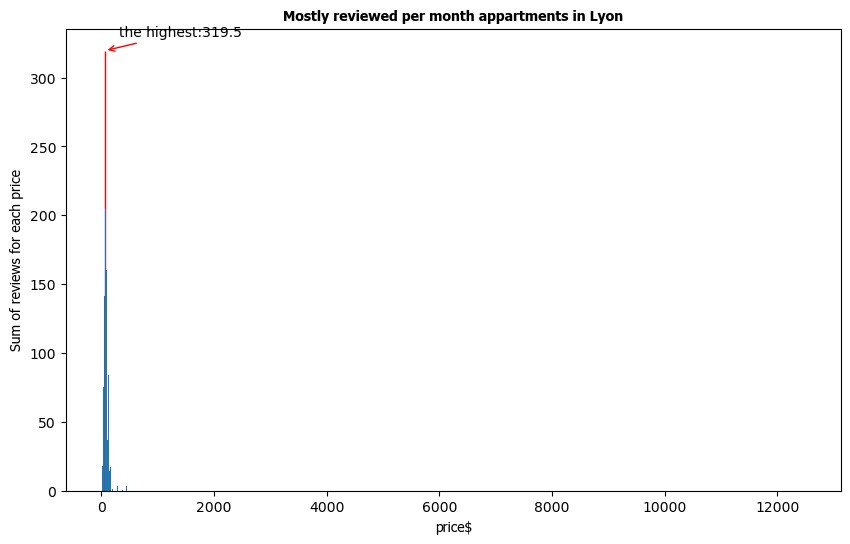

In [81]:
# Plotting the final result
plt.figure(figsize = (10, 6))
bars = plt.bar(sum_rev['price'], sum_rev['reviews_per_month'])
plt.title('Mostly reviewed per month appartments in Lyon', {'fontname' : 'Tahoma'}, fontweight = 'bold', fontsize = 10)
plt.xlabel('price$', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)
plt.ylabel('Sum of reviews for each price', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)
# plt.xlim(0, 200)
# plt.ylim(0, 350)

high_bar_index = sum_rev['reviews_per_month'].idxmax()
bars[high_bar_index].set_color('red')
highest_value = sum_rev['reviews_per_month'].max()

#i want to find indicate the highest bar by writing its value near the bar by using annotate()
plt.annotate(f'the highest:{highest_value}',
            (sum_rev['price'][high_bar_index], highest_value),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))

As we see that linear scale is not comfortable and readable for understanding so we have for example two ways. The fist is adding the axis limits, the seconod is to make the scale logarithmic. The 1st way is not entirely correct to use since the boundaries are not always clear and it is difficult to automate the setting of these boundaries. So thats why we will use the logarithmic scaling which presented below

*3. Is a linear scale on the price convenient? How to change to a logarithmic scaling?*

Text(10, 10, 'the highest:319.5')

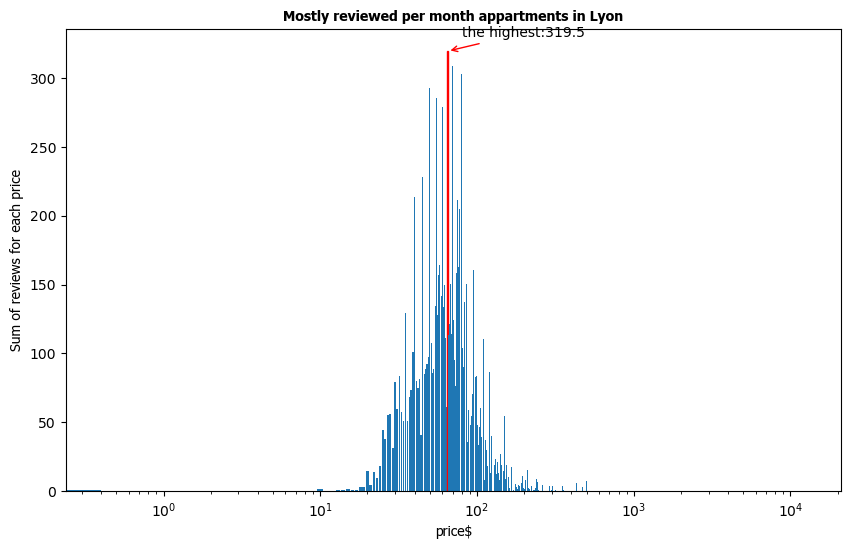

In [83]:
# in this code i add the logaritmic scale 
sum_rev = df.groupby('price')['reviews_per_month'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.xscale('log')  # Set the x-axis to logarithmic scale
bars = plt.bar(sum_rev['price'], sum_rev['reviews_per_month'])
plt.title('Mostly reviewed per month appartments in Lyon', {'fontname' : 'Tahoma'}, fontweight = 'bold', fontsize = 10)
plt.xlabel('price$', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)
plt.ylabel('Sum of reviews for each price', {'fontname':'Tahoma'}, fontweight = 'light', fontsize = 10)


#i need to find the index of the highest value
high_bar_index = sum_rev['reviews_per_month'].idxmax()

#i want to highlight the highest bar with another color by using 'set_color' 
bars[high_bar_index].set_color('red')
#i want to indicate the highest bar by writing its value near the bar by using annotate()
highest_value = sum_rev['reviews_per_month'].max()
highest_value
plt.annotate(f'the highest:{highest_value}',
            (sum_rev['price'][high_bar_index], highest_value),
            xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))
            

### 1.1 A scatter plot for spatial data 

The goal is now to visualise the price per night as a function of the geospatial location (longitude, latitude); no need to project data, you may assume the earth locally flat. The data should be presented using a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) where

* the size of the dot `s` is proportional to the price per night
* the color of the dot `c` is _proportional_ to the occupation (proportional in days/year), choosing a greyscale for the color map (black is most occupied, white is less occupied).

Do not forget to put a colorbar next to your plot, helping the observer in its interpretation.


In [89]:
# importing necessary linbrary
from matplotlib.colors import LinearSegmentedColormap
# i give the name of variables to use them in scatter plot where 
# the size of the dot `s` is proportional to the price per night
# the color of the dot `c` is _proportional_ to the occupation (proportional in days/year)
size = df['price']
color = df['availability_365']

# REMARK
When  we choose the `gray` type of colormap the black color corresponds the zero and white is the last value. In task we have the following condition `black is most occupied, white is less occupied` that why we need to reverse the colors. So we define a reversed grayscale colormap using LinearSegmentedColormap. This colormap goes from white (1, 1, 1) to black (0, 0, 0), effectively reversing the colors. We use the reversed colormap for the color map (cmap) when creating the scatter plot, which results in the colorbar being reversed, with black indicating higher values and white indicating lower values.

*I found two methods for making this. The `1st` one is presented bellow*

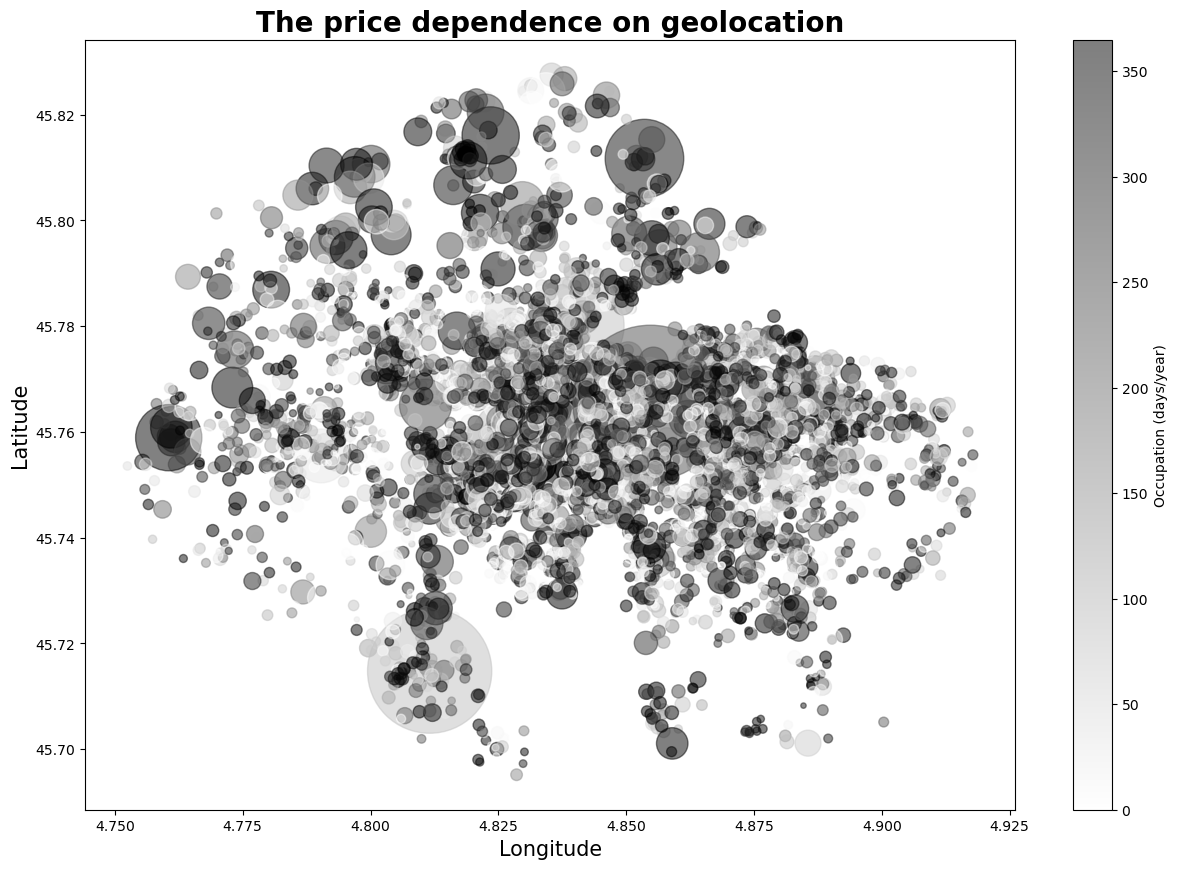

In [93]:
cmap = LinearSegmentedColormap.from_list("reversed_gray", [(1, 1, 1), (0, 0, 0)])

# plotting the figure where x is longitude y is latitude
plt.figure(figsize = (15, 10))
plt.scatter(df['longitude'], df['latitude'], 
            s = size, c = color, cmap = cmap, alpha = 0.5 )

# naming and formatting the labels and titles 
plt.title('The price dependence on geolocation', fontweight = 'bold', fontsize = 20)
plt.xlabel('Longitude', fontweight = 'light', fontsize = 15)
plt.ylabel('Latitude', fontweight = 'light', fontsize = 15)

#adding the colorbar
plt.colorbar().set_label('Occupation (days/year)')

# 'viridis', 'plasma', 'inferno', 'magma', 'cividis'])

*The `2nd` one is more easer. We just have to add `_r` to the cmap param*

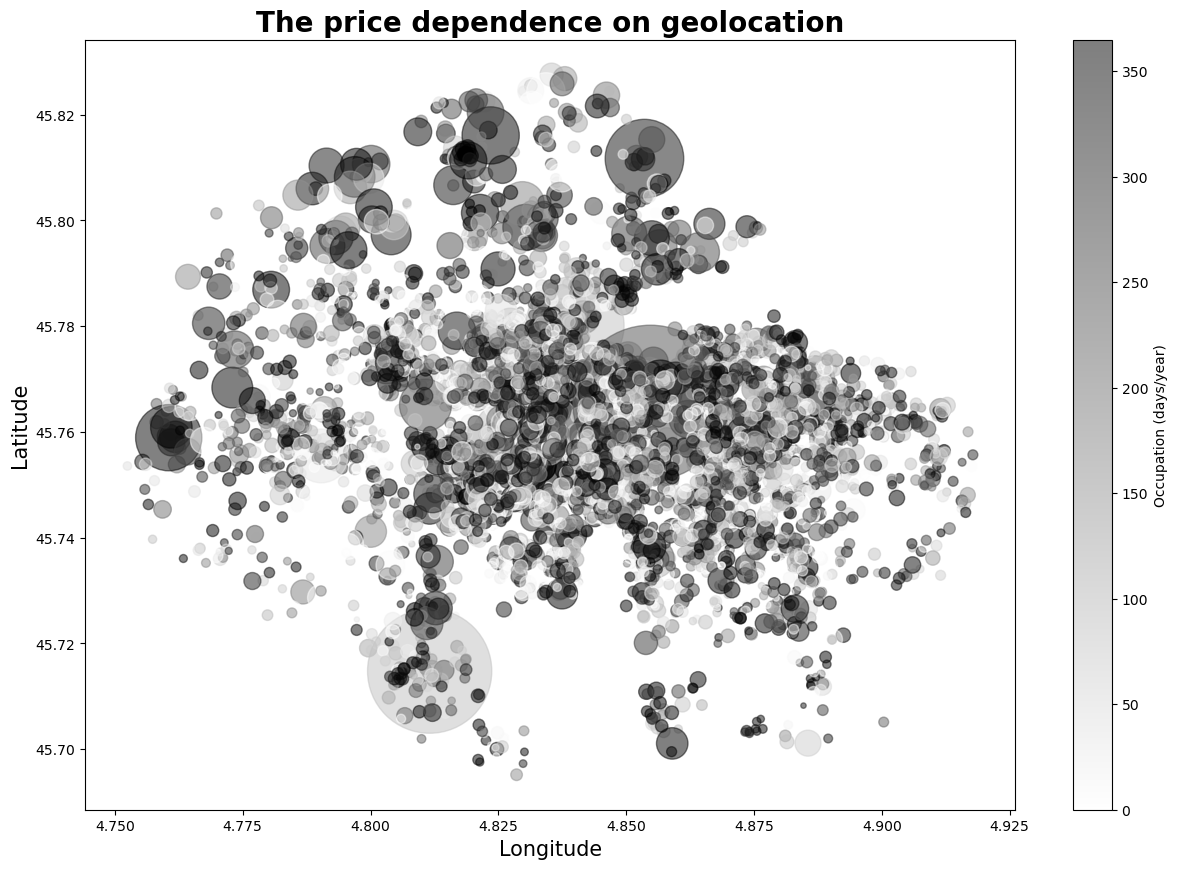

In [96]:
size = df['price']
color = df['availability_365']
plt.figure(figsize = (15, 10))
# here we add _r to cmap = 'gray_r'
plt.scatter(df['longitude'], df['latitude'], 
            s = size, c = color, cmap = 'gray_r', alpha = 0.5 )
plt.title('The price dependence on geolocation', fontweight = 'bold', fontsize = 20)
plt.xlabel('Longitude', fontweight = 'light', fontsize = 15)
plt.ylabel('Latitude', fontweight = 'light', fontsize = 15)
plt.colorbar().set_label('Occupation (days/year)')


*Also we can change the colormap colors for several types ('viridis', 'plasma', 'inferno', 'magma', 'cividis') for example i use the `'viridus'` one. And the adding `_r` works the same(reversing the colorbar)*

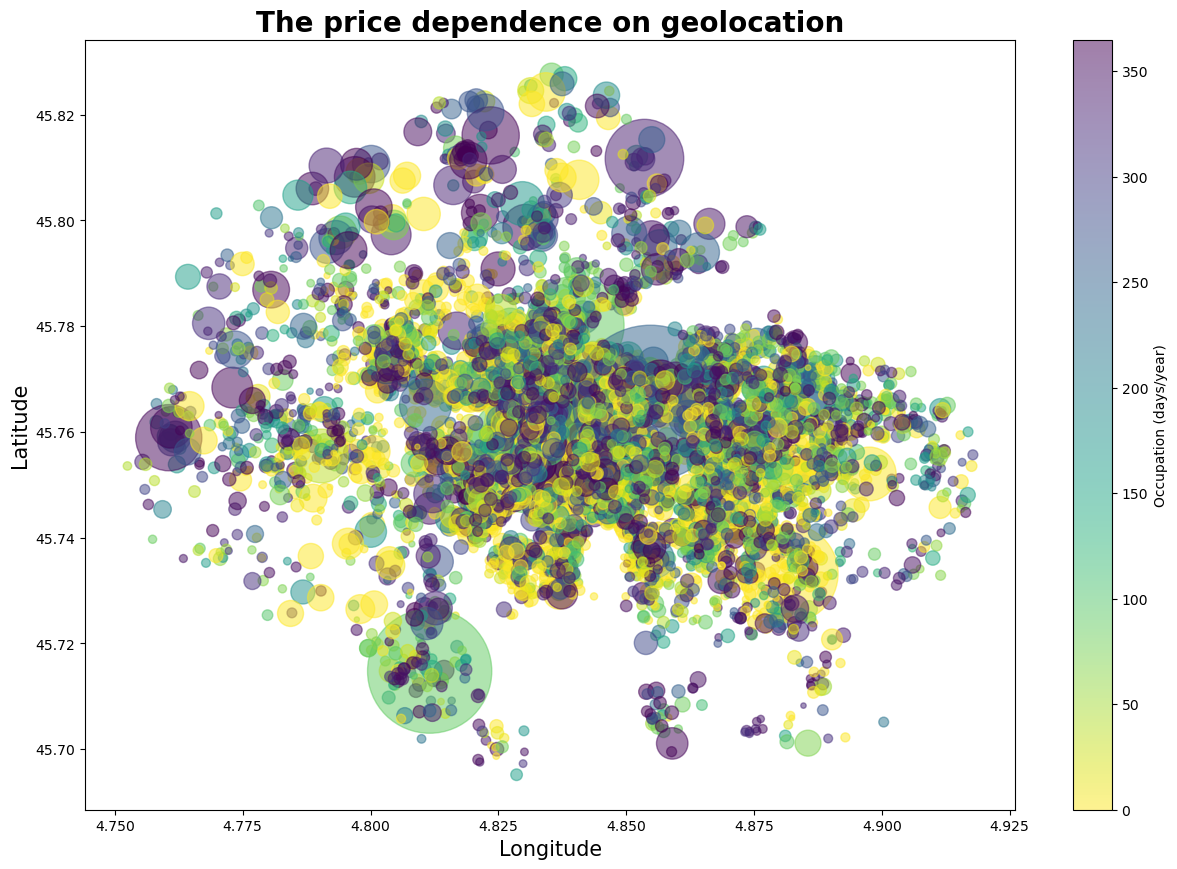

In [97]:
size = df['price']
color = df['availability_365']
plt.figure(figsize = (15, 10))
orig_plot = plt.scatter(df['longitude'], df['latitude'], 
            s = size, c = color, cmap ='viridis_r', alpha = 0.5 )

plt.title('The price dependence on geolocation', fontweight = 'bold', fontsize = 20)
plt.xlabel('Longitude', fontweight = 'light', fontsize = 15)
plt.ylabel('Latitude', fontweight = 'light', fontsize = 15)
plt.colorbar().set_label('Occupation (days/year)')

### Hints

1. Read in the data with `pandas` and query your `dataframe` as to answer the following questions
  * what is the most expensive price?
  * at what price does one get the most reviews per month? (this time without plotting)
2. Once you are sure how to access your data, you may call plotting function directly on your `dataframe` as documented [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)


*What is the most expensive price?*

In [16]:
df['price'].max() # the most expensive price

12500

*At what price does one get the most reviews per month? (this time without plotting)* 

In [100]:
sum_rev = df.groupby('price')['reviews_per_month'].sum().reset_index()

# i find the row(s) with the highest total reviews per month
price_most_reviews_row = sum_rev.loc[sum_rev['reviews_per_month'] == sum_rev['reviews_per_month'].max() ]

# extract the price from row(s) whicj we find before. Value[0] i write because i want to take the value from only the first row 
price_max = price_most_reviews_row['price'].values[0]
# printing the final result which is 65$
print(f'The price of appartment at which you get the most reviews per month is {price_max}$')

The price of appartment at which you get the most reviews per month is 65$


# 2. Occupancy dataset

## 2.0 Loading data

* When loading the data into a `dataframe`, make sure to use the date as the _index_: this will allow you to conveniently call any plotting function on your data.
* The data contains multiple attributes, most of them being _features_ that help to predict the target value _occupancy_ (binary value). 

In [101]:
# here we use the set_index('date') for making the date as the index
dataset = pd.read_csv('datatest.txt', sep = ',').set_index('date')
dataset2 = pd.read_csv('datatest2.txt', sep = ',').set_index('date')

In [104]:
# union two dataset in one by using concat because we have the same names of columns un both datasets
all = pd.concat([dataset2, dataset])
all

Temperature   Humidity       Light          CO2  \
date                                                                   
2015-02-11 14:48:00    21.760000  31.133333  437.333333  1029.666667   
2015-02-11 14:49:00    21.790000  31.000000  437.333333  1000.000000   
2015-02-11 14:50:00    21.767500  31.122500  434.000000  1003.750000   
2015-02-11 14:51:00    21.767500  31.122500  439.000000  1009.500000   
2015-02-11 14:51:59    21.790000  31.133333  437.333333  1005.666667   
...                          ...        ...         ...          ...   
2015-02-04 10:38:59    24.290000  25.700000  808.000000  1150.250000   
2015-02-04 10:40:00    24.330000  25.736000  809.800000  1129.200000   
2015-02-04 10:40:59    24.330000  25.700000  817.000000  1125.800000   
2015-02-04 10:41:59    24.356667  25.700000  813.000000  1123.000000   
2015-02-04 10:43:00    24.408333  25.681667  798.000000  1124.000000   

                     HumidityRatio  Occupancy  
date                                           
2015-02-11 14:48:00       0.005021          1  
2015-02-11 14:49:00       0.005009          1  
2015-02-11 14:50:00       0.005022          1  
2015-02-11 14:51:00       0.005022          1  
2015-02-11 14:51:59       0.005030          1  
...                            ...        ...  
2015-02-04 10:38:59       0.004829          1  
2015-02-04 10:40:00       0.004848          1  
2015-02-04 10:40:59       0.004841          1  
2015-02-04 10:41:59       0.004849          1  
2015-02-04 10:43:00       0.004860          1  

[12417 rows x 6 columns]

## 2.1 A simple display

Using subplots, plot all of the different features, each time using a dual y-axis. On the left-hand y-axis the feature value will be given, on the righ-hand y-axis you will have the _occupancy_.
To do so proceed in steps

1. make sure you are able to draw a single graph of any of the chosen features as a function of the date
2. plot the _occupancy_ on a secondary y-axis

In [107]:
# importing necessary library. 
# this library i use for date formatting in plot because in our df we have an amount of dates with the time which made our plot nonreadable 
from matplotlib.dates import DateFormatter, YearLocator

# Create a single plot for the chosen feature 'Temperature' with naming and formatting the labels and titles also choosing the colors from GRB palette 
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(all['Temperature'], color='#222e51', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature', color='#222e51')
ax1.tick_params('y', colors='#222e51')

# Set the major locator to show ticks at January 1st of every year
ax1.xaxis.set_major_locator(YearLocator(1)) #for displaying the sasrt of each year the 1st January with the interval of 1 year
ax1.xaxis.set_major_formatter(DateFormatter('%Y')) # for displaying only the year 

# Rotate and format the date labels for better readability
date_format = DateFormatter("%Y")
ax1.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90)

#Here i create second y-axis for occupancy by using twinx()
ax2 = ax1.twinx()
ax2.plot(all['Occupancy'], color='#a7ced9', linestyle='dashed', label='Occupancy')
ax2.set_ylabel('Occupancy', color='#a7ced9')
ax2.tick_params('y', colors='#a7ced9')

plt.title(f'Temperature and Occupancy')

Text(0.5, 1.0, 'Temperature and Occupancy')

3. make multiple subplots with _occupancy_ on the secondary y-axis, one for each feature

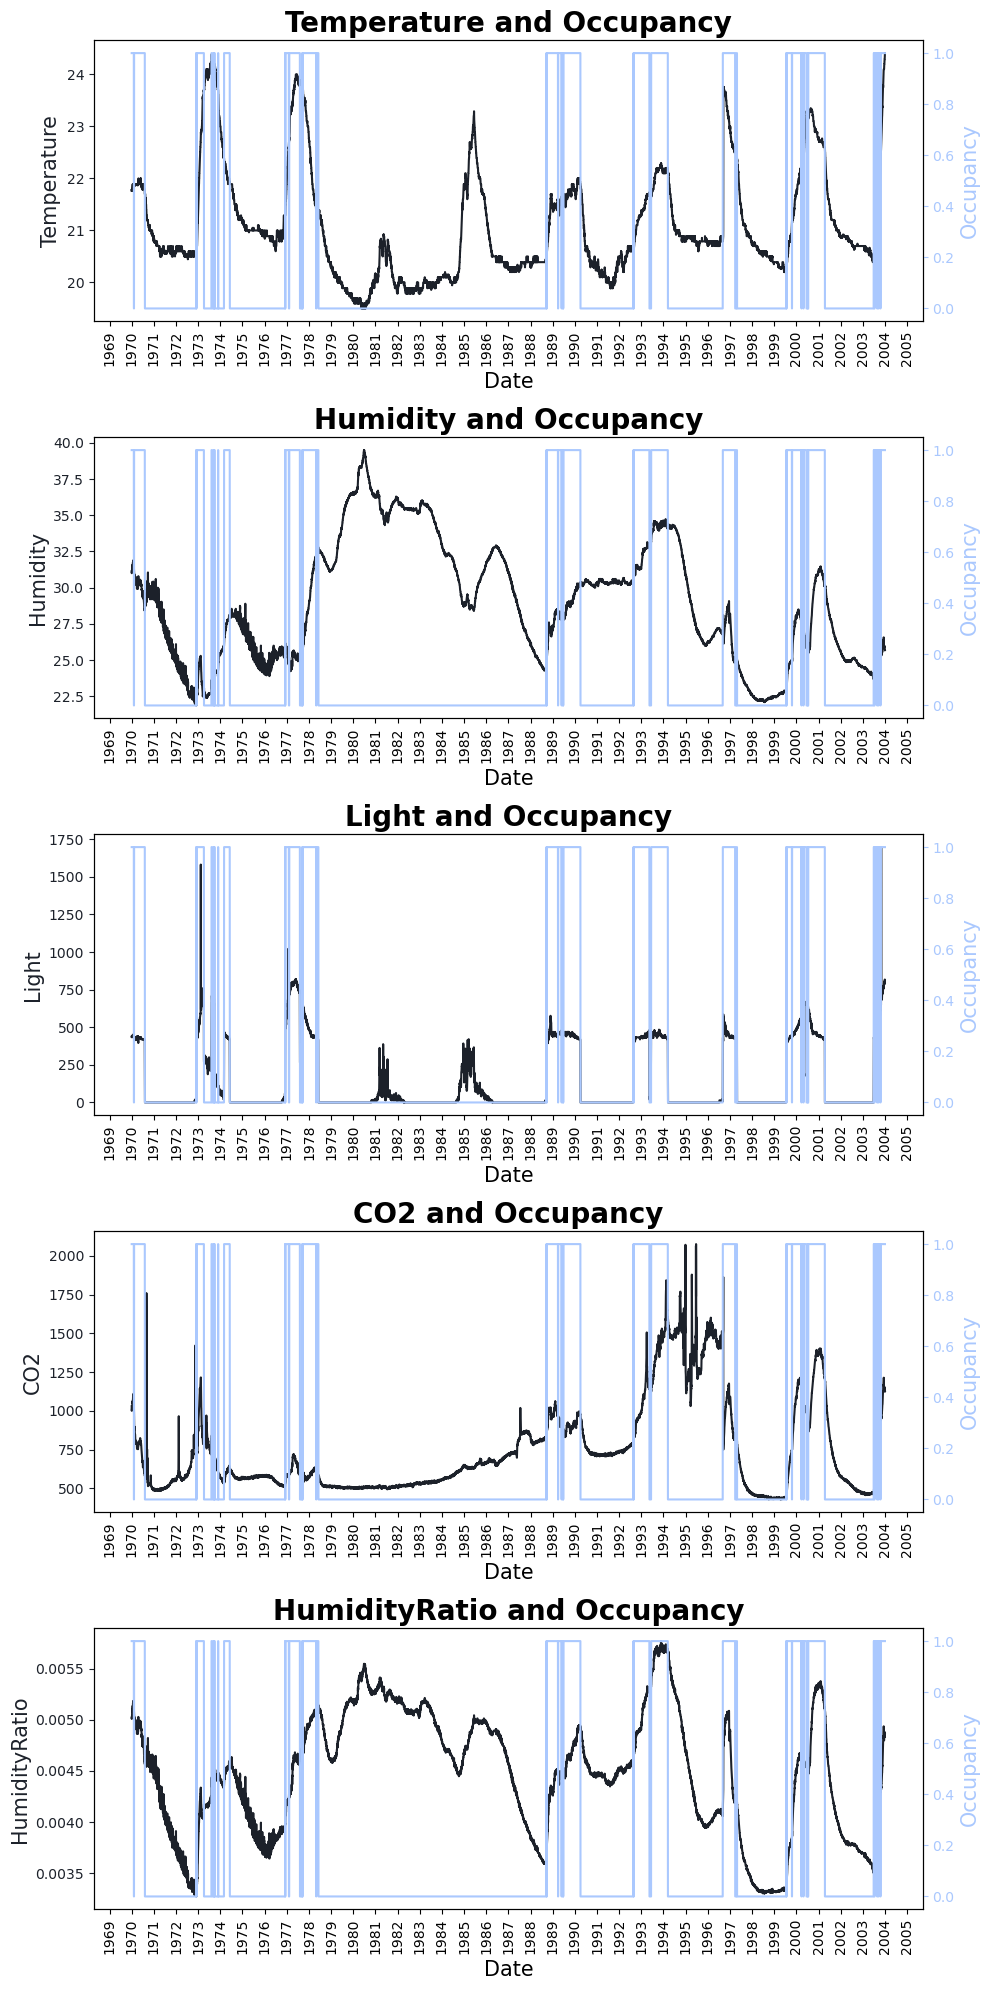

In [108]:
# Creating the list of features to plot
features_to_plot = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio' ]

# Create multiple plots for each feature and creating the figure 
fig, axs = plt.subplots(len(features_to_plot), 1,  figsize=(10, 4 * len(features_to_plot))) 

# i use the enumerate func for plotting one by one all the features which in my list
for i, feature in enumerate(features_to_plot): 
    axs[i].plot(all.index, all[feature], color='#1c212a', label=feature) 
    axs[i].set_xlabel('Date', fontweight = 'light', fontsize = 15)
    plt.xticks(rotation=90)
    axs[i].set_ylabel(feature, color='#1c212a', fontweight = 'light', fontsize = 15)
    axs[i].tick_params('y', colors='#1c212a',grid_color='#1c212a')

    # set the major locator to show ticks at January 1st of every year
    axs[i].xaxis.set_major_locator(YearLocator(1)) #for displaying the sasrt of each year the 1st January with the interval of 1 year
    axs[i].xaxis.set_major_formatter(DateFormatter('%Y')) # for displaying only the year 

    # rotate and format the date labels for better readability
    date_format = DateFormatter("%Y")
    axs[i].xaxis.set_major_formatter(date_format)
    plt.setp(axs[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels
    
    # Creating a secondary y-axis for occupancy
    ax2 = axs[i].twinx()
    ax2.plot(all.index, all['Occupancy'], color='#aac8fe',  label='Occupancy')
    ax2.set_ylabel('Occupancy', fontweight= 'light', fontsize = 15, color='#aac8fe')
    ax2.tick_params('y', colors='#aac8fe')

    axs[i].set_title(f'{feature} and Occupancy', fontweight = 'bold', fontsize = 20)

plt.tight_layout()
plt.show()


*`As we can see in some plots we have some false data that can be caused by many parameters (for example, a sensor malfunction or that someone touched it). For making more precisious and right anlysis this data we can drop. Also we can see the correlation between the location of people and the sensor values. Like there are people - higher tempo, there are people - more light.`* 

## 2.2 Pairwise interaction plot

* Use the function [`scatter_matrix`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix#pandas.plotting.scatter_matrix) to make a pairwise interaction plot, or [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) from `seaborn`. The latter takes an additional `hue` keyword that makes it possible to distinguish on the level of _occupancy_.
* Once your plot is ready, write a paragraph documenting your observations from the pairwise interaction plot.

In [55]:
#using the scatter_matrix to make the pairwise interastion plot
pd.plotting.scatter_matrix(all.iloc[:, 0:4:1], figsize = (10, 8))

array([[<Axes: xlabel='Temperature', ylabel='Temperature'>,
        <Axes: xlabel='Humidity', ylabel='Temperature'>,
        <Axes: xlabel='Light', ylabel='Temperature'>,
        <Axes: xlabel='CO2', ylabel='Temperature'>],
       [<Axes: xlabel='Temperature', ylabel='Humidity'>,
        <Axes: xlabel='Humidity', ylabel='Humidity'>,
        <Axes: xlabel='Light', ylabel='Humidity'>,
        <Axes: xlabel='CO2', ylabel='Humidity'>],
       [<Axes: xlabel='Temperature', ylabel='Light'>,
        <Axes: xlabel='Humidity', ylabel='Light'>,
        <Axes: xlabel='Light', ylabel='Light'>,
        <Axes: xlabel='CO2', ylabel='Light'>],
       [<Axes: xlabel='Temperature', ylabel='CO2'>,
        <Axes: xlabel='Humidity', ylabel='CO2'>,
        <Axes: xlabel='Light', ylabel='CO2'>,
        <Axes: xlabel='CO2', ylabel='CO2'>]], dtype=object)

c:\Users\Liaman\miniconda3\envs\phelma\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


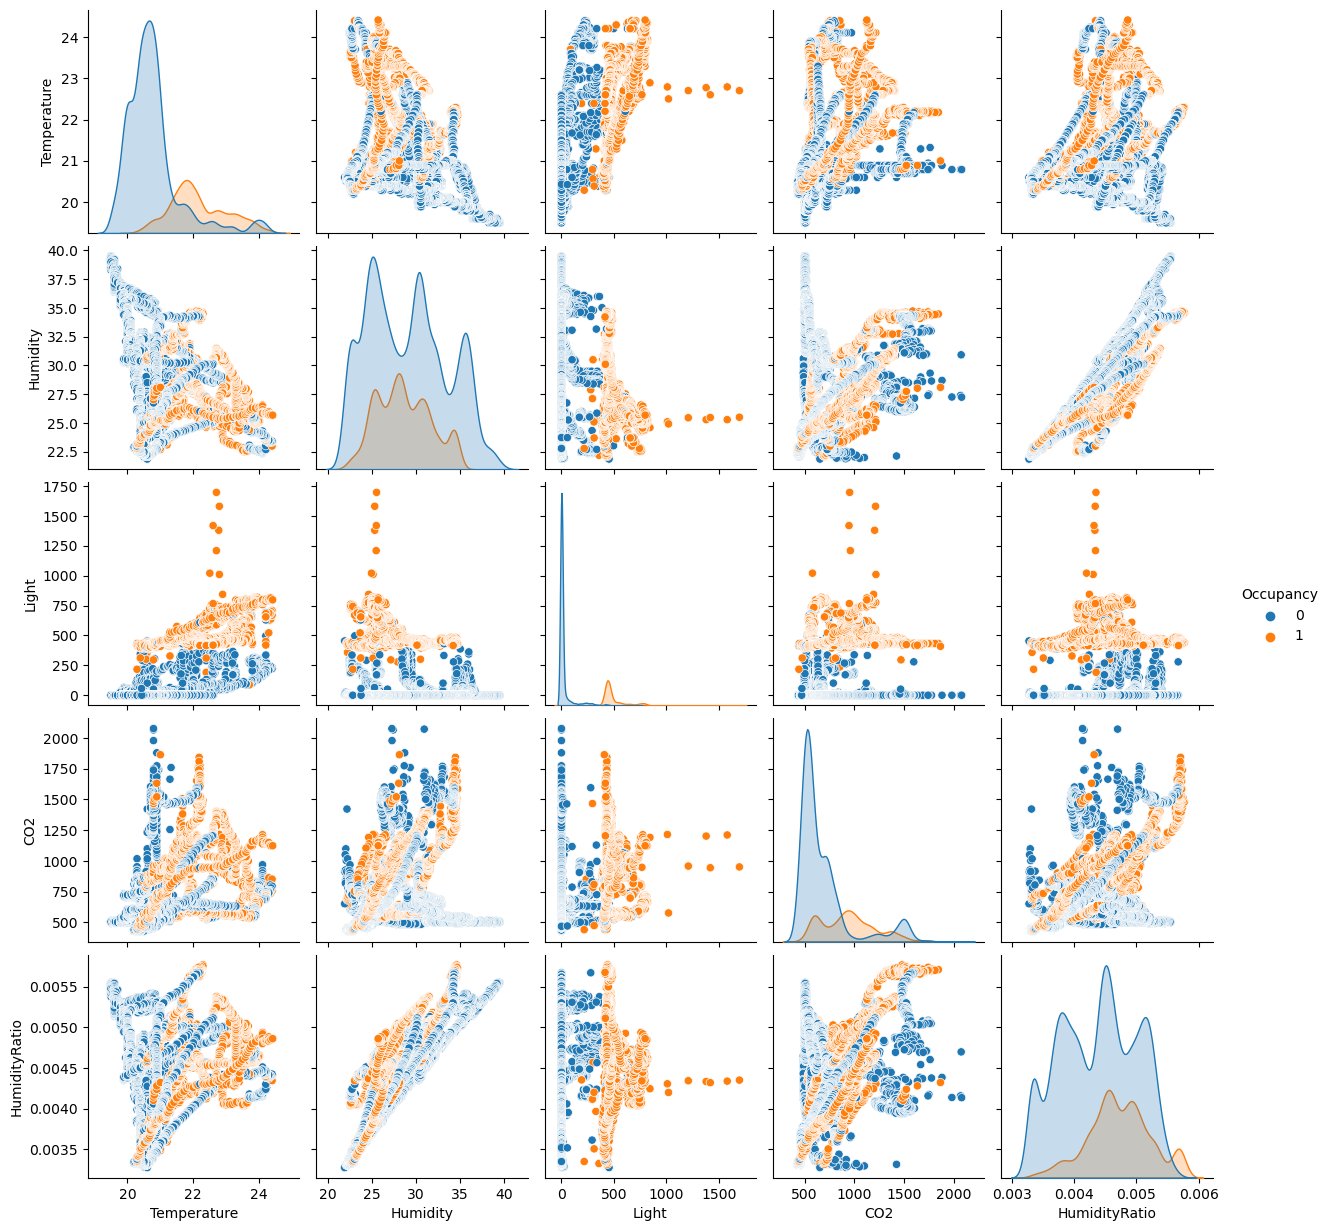

In [109]:
#importinh necessary library 
import seaborn as sns

#ploting with `hue` keyword that makes it possible to distinguish on the level of _occupancy_.
sns.pairplot(all, hue = "Occupancy")

*We can see the for example correlation between humidity and humidity_ratio (2nd row 5col), such as the more humidity, the more humidity_ratio. Also It turns out that with more light in the 3d column (to the right along the horizontal axis), the data shows that there were people and its logical. Regarding the vertical height, there seems to be little information there, since the previous graphs have high emissions when there are no people. The same condidtion in 3d row but now it horizontal, when occupancy is 1 the points show us that the light have bigger values because of people. The rest, due to their mixture, are more random and it is impossible to predict with high probability whether there are people there or not.*